In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
def AddImage(path):
  img = Image.open(path)
  img = img.resize((25,25))
  img = img.convert('L')
  x = np.array(img, np.float32)
  x = x.reshape(-1,625)
  x = x / 255
  return x[0]

In [4]:
pathBig = '/content/drive/My Drive/Нейронки/lab2/bigA/01_00_00_0{0}.png'
pathSmall = '/content/drive/My Drive/Нейронки/lab2/smallA/00_00_00_0{0}.png'
x_general = []
y_general = []
for i in range(100):
  x_general.append(AddImage(pathBig.format(str(i).zfill(3))))
  y_general.append(1)
for i in range(100):
  x_general.append(AddImage(pathSmall.format(str(i).zfill(3))))
  y_general.append(0)

In [5]:
x_general = np.array(x_general)
y_general = np.array(y_general)
x_train, x_test, y_train, y_test = train_test_split(x_general, y_general, test_size=0.33, random_state=100)

In [6]:
from sklearn import svm

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
acc = []
for i in kernels:
  clf = svm.SVC(kernel= i)
  clf.fit(x_train, y_train)
  print("Kernel: ", i)
  print("Train score :", clf.score(x_train, y_train))
  print("Test score :", clf.score(x_test, y_test))
  acc.append(clf.score(x_test, y_test))

best_id = acc.index(max(acc))
print("\n\nBest kernel:", kernels[best_id], "Best score:", acc[best_id])

Kernel:  linear
Train score : 0.9925373134328358
Test score : 0.9545454545454546
Kernel:  poly
Train score : 1.0
Test score : 0.9545454545454546
Kernel:  rbf
Train score : 0.9701492537313433
Test score : 0.9393939393939394
Kernel:  sigmoid
Train score : 0.5223880597014925
Test score : 0.45454545454545453


Best kernel: linear Best score: 0.9545454545454546


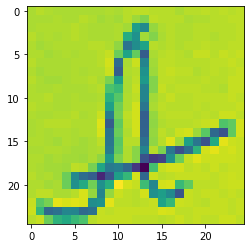

In [8]:
plt.imshow(x_train[0].reshape(25,25))